# Required assignment 10.1 Evaluating decision trees and ensemble classifiers using feature selection

## Overview
In this notebook, you’ll build tree ensemble models using random forest, bagging and boosting classifiers, as well as explore two feature selection methods.

## Outline

- Part 1: Importing and formatting the data set
- Part 2: Fitting a single decision tree
- Part 3: Using a random forest classifier
- Part 4: Using the AdaBoost classifier
- Part 5: Using the bagging classifier
- Part 6: Choosing the best classifier, retraining using all the samples and testing on the test set (model selection)
- Part 7: Feature selection

In [1]:
# Import necessary libraries
import numpy as np
import pandas as pd
from sklearn import tree, ensemble
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder
from sklearn.inspection import permutation_importance
from sklearn.ensemble import BaggingClassifier
from sklearn.tree import DecisionTreeClassifier

# Tree ensembles

[Back to top](#Index:)

<a id='part1'></a>

### Part 1: Importing and formatting the data set

In this section, you will use a data set from the University of Medicine and Pharmacy of Craiova, Romania to predict the hospitalisation period of patients after colon cancer operations based on socio-economic variables and clinical information. You can read more about the data and its origins [here](https://figshare.com/articles/dataset/LOS_Colon_Cancer_621_cases/4747246/1).

The data is stored in .xlsx format in the `colon_data.xlsx` file. Use the `read_excel()` function to load it.

In [2]:
df = pd.read_csv('data/colon_data.csv')
len(df)

298

In [3]:
print(df.columns)

Index(['AGE', 'SEX', 'TOPOGRAPHY', 'STAGE', 'T', 'N', 'M', 'SURGERY', 'CLASS'], dtype='object')


Use the .head() function to visualise the data.

In [4]:
df.head()

,AGE,SEX,TOPOGRAPHY,STAGE,T,N,M,SURGERY,CLASS
0,64,M,rect,three,T4,Nx,Mx,ten,medium
1,70,M,rect,three,T4,Nx,Mx,ten,medium
2,76,F,cec,three,T3,Nx,Mx,three,medium
3,62,M,cec,three,T2,Nx,Mx,three,short
4,62,M,cec,two,T2,Nx,Mx,three,short


Check the unique() values of df['CLASS'], then replace the categorical values of the CLASS variable with numerical values.

In [5]:
df['CLASS'].unique()

array(['medium', 'short', 'long'], dtype=object)

### Question 1:

The target class `CLASS` has three unique values. Use `map()` and convert `short`,`medium` and `long` to 1,2 and 3, respectively.

- Make a copy of `df`.



In [6]:
### GRADED

# 1) copy the original df
df_copy = df.copy()
ans1 = None

# YOUR CODE HERE
#raise NotImplementedError()

# 2) map class labels to integers: short -> 1, medium -> 2, long -> 3
label_map = {'short': 1, 'medium': 2, 'long': 3}
df_copy['CLASS'] = df_copy['CLASS'].map(label_map)

# 3) return the mapped target column
ans1 = df_copy['CLASS']

print(ans1)



0      2
1      2
2      2
3      1
4      1
      ..
293    1
294    1
295    2
296    3
297    3
Name: CLASS, Length: 298, dtype: int64


- Use `LabelEncoder()` to convert the categorical columns into encoded numerical columns. 

- Concatenate these with the target variable `CLASS` to create the combined data set.

In [7]:
label_enc = LabelEncoder()

# List the categorical columns
cat_cols = ['SEX', 'TOPOGRAPHY', 'STAGE', 'T', 'N', 'M', 'SURGERY']

# Apply label encoding to each
for col in cat_cols:
    df[col] = label_enc.fit_transform(df[col])


In [8]:
combined_df = pd.concat([df[cat_cols], df_copy['CLASS']], axis=1)

In [9]:
combined_df.rename(columns={'CLASS': 'CLASS_mapped'}, inplace=True)
print(combined_df.head())

   SEX  TOPOGRAPHY  STAGE  T  N  M  SURGERY  CLASS_mapped
0    1           6      2  3  3  3        0             2
1    1           6      2  3  3  3        0             2
2    0           0      2  2  3  3        1             2
3    1           0      2  1  3  3        1             1
4    1           0      3  1  3  3        1             1


Run the cell below to convert the df into a `NumPy` array.

In [10]:
Xy=np.array(combined_df)

Before splitting the data into a training set, a test set and a validation set, you need to divide $X$ and $y$ into two arrays: the first one, $X$, a 2D array containing all the predictors, and the second, $y$, a 1D array with the response.

Run the code cell below to generate $X$. Complete the remaining code to define $y$.

In [11]:
X=Xy[:,:-1]
y=Xy[:,-1]

Next, split the messages into 50 per cent training data, 25 per cent validation data and 25 per cent test data.

Run the code below to split $X$ and $y$ into training, validation and test sets.

In [12]:
trainsize = int(len(df)/2)
trainplusvalsize = int(len(df)/4)
X_train=X[:trainsize]
X_val=X[trainsize:trainsize + trainplusvalsize]
X_test=X[trainsize + trainplusvalsize:]

y_train=y[:trainsize]
y_train = pd.Categorical(y_train)
y_val=y[trainsize:trainsize + trainplusvalsize]
y_test=y[trainsize + trainplusvalsize:]

[Back to top](#Index:)

<a id='part2'></a>

### Part 2: Fitting a single decision tree

To solve Question 2, use the same code from Self-study try-it activity 10.1: Selecting tree depth in Python.

If you need a refresher on on how to select tree depth in Python, review Mini-lesson 10.2: Selecting tree depth in Python for additional guidance.


    # For i in range(max_depth):
    #  compute new classifier clf with depth = max_depth = i+1
    #  fit the X and y training sets with the new classifier
    #  compute the updated trainscore using .score() on the training set
    #  compute the updated valscore using .score() on the validation set
    #  print the scores
    print ( 'Depth:', i+1, 'Training Score:', trainscore, 'Validation Score:', valscore)
     
    # If valscore is better than bestscore and trainscore is greater than or equal to min_train_score:
        # update the value of bestscore
        # increase bestdepth by one unit

In [ ]:
y_val = pd.factorize(y_val)[0]  # Factorise once here

max_depth = 15
bestdepth = -1
bestscore = 0
min_train_score = 0.7


for i in range(max_depth):
    clf = tree.DecisionTreeClassifier(max_depth=i+1)
    clf.fit(X_train, y_train)
    trainscore = clf.score(X_train, y_train)
    valscore = clf.score(X_val, y_val)  # Use factorized y_val here
    print('Depth:', i+1, 'Train Score:', trainscore, 'Validation Score:', valscore)

    if valscore > bestscore and trainscore >= min_train_score:
        bestscore = valscore
        bestdepth = i+1

print(bestdepth, bestscore)


### Question 2:

What is the best maximum depth?


***Answer:***

a. Best maximum depth: 5

b. Best maximum depth: 1

c. Best maximum depth: 8

Provide your answer to `ans2`.

In [47]:
###GRADED CELL
ans2 = None

# YOUR CODE HERE
#raise NotImplementedError()

#Validation scores peak at depth = 8 with 0.1756756757
ans2 = "c"

print(ans2)


c


[Back to top](#Index:)

<a id='part3'></a>

### Part 3: Using a random forest classifier

In this section, you will build a random forest model in `sklearn` and explore the effect of the `max_features` hyperparameter.

### Question 3:

- Use the `ensemble.RandomForestClassifier()` function to build a random forest model with the default parameters.

- Use the `.fit()` function to train it, similar to what you did for the decision tree.

- Store your model to `rf_clf`.

In [48]:
###GRADED

rf_clf = None

# YOUR CODE HERE
#raise NotImplementedError()

# Build a random forest with default hyperparameters (max_features='sqrt')
rf_clf = ensemble.RandomForestClassifier()
rf_clf.fit(X_train, y_train)


RandomForestClassifier()

In [49]:
print ( 'Full tree guess train/validation ',rf_clf.score(X_train, y_train),rf_clf.score(X_val, y_val))

Full tree guess train/validation  0.9328859060402684 0.0945945945945946


In random forest classifiers, the algorithm considers only a subset of features at each split. This is controlled by the `max_features` argument. By default, this is set to `"sqrt"` in `scikit-learn`, which selects the square root of the total number of features.

In this context, you will explore both setting `max_features` to `"sqrt"` and to `None`. When `max_features = None`, the algorithm uses all features at every split.


In [50]:
# For loop looking at RF with different max_features:

np.random.seed(1)
for max_features in ["sqrt",  None]:
    # build the rf classifier wwith different arguments for max_features
    # fit it to the training data
    rf_clf = ensemble.RandomForestClassifier(max_features = max_features)
    rf_clf.fit(X_train, y_train)


    print ( f'Full tree guess train/validation {max_features}',rf_clf.score(X_train, y_train),rf_clf.score(X_val, y_val))


Full tree guess train/validation sqrt 0.9328859060402684 0.06756756756756757
Full tree guess train/validation None 0.9328859060402684 0.10810810810810811


In this scenario, setting `max_features = None` shows a slight advantage on the validation set. This may be because the model is able to capture more complex relationships by using all available features at each split, whereas `max_features="sqrt"` takes a more constrained view and may miss some interactions.

However, this result may not generalise. The `sqrt` setting is typically preferred as it helps reduce overfitting and supports better generalisation across different data sets.

[Back to top](#Index:)

<a id='part4'></a>

### Part 4: Using AdaBoost classifier (boosting)

You’ll use AdaBoost from `scikit-learn` for the boosting algorithm. It builds an ensemble of weak classifiers (in this case, decision trees) by sequentially giving more weight to the instances that are misclassified.

### Question 4:
- Use the `.AdaBoostClassifier()` to build a boosting model and fit it to the training data.

- Store your model to `ab_clf`.

In [51]:
from sklearn.ensemble import AdaBoostClassifier

###GRADED
ab_clf = None

# YOUR CODE HERE
#raise NotImplementedError()

ab_clf = ensemble.AdaBoostClassifier()
ab_clf.fit(X_train, y_train)


AdaBoostClassifier()

In [52]:
print ( 'Full tree guess train/validation ',ab_clf.score(X_train, y_train),ab_clf.score(X_val, y_val))

Full tree guess train/validation  0.738255033557047 0.12162162162162163


[Back to top](#Index:)

<a id='part5'></a>

### Part 5: Using the bagging classifier

You’ll use the `sklearn.ensemble.BaggingClassifier` function from `scikit-learn` for the bagging algorithm. This ensemble meta-estimator fits base classifiers on random subsets of the original data and combines their predictions to produce the final output.

### Question 5:

- Use `DecisionTreeClassifier()` as the base classifier and assign it to `base_clf`.

- Use `BaggingClassifier` with the following parameters and assign it to `bagging_clf`:

  - estimator = `base_clf`

  - n_estimators = 50

  - random_state = 42

- Fit the `BaggingClassifier` on the training data.


In [22]:
### GRADED

base_clf = None
bagging_clf = None

# YOUR CODE HERE
#raise NotImplementedError()
base_clf = DecisionTreeClassifier(random_state=42)  
bagging_clf = BaggingClassifier(
    estimator=base_clf, #base classifier
    n_estimators=50, #number of trees in the ensemble
    random_state=42, #for reproducibility
    n_jobs=-1 #use all CPU cores
)

# Fit to training data
bagging_clf.fit(X_train, y_train)



BaggingClassifier(estimator=DecisionTreeClassifier(random_state=42),
                  n_estimators=50, n_jobs=-1, random_state=42)

In [23]:
print ( 'Full tree guess train/validation ',bagging_clf.score(X_train, y_train),bagging_clf.score(X_val, y_val))

Full tree guess train/validation  0.9328859060402684 0.0945945945945946


[Back to top](#Index:)

<a id='part6'></a>

### Part 6: Choosing the best classifier, retraining using all the samples and testing on the test set (model selection)

### Question 6:

Which model would you use for this data set? Decision tree, random forest, boosting or bagging? Why?

***Answer:***

a. Random forest because it handles overfitting better than a single decision tree

b. Single decision tree with best depth as 5 because the validation score is high

c. Bagging classifier because its training accuracy is high

Provide your answer to `ans6`: a,b, or c.

In [53]:
### GRADED
ans6 = None

# YOUR CODE HERE
#raise NotImplementedError()
ans6 = "a"

print(ans6)

a


Retrain the best model with both the training and validation data and test it on the test data.

In [54]:
X_trainval = X[:trainsize + trainplusvalsize, :]
y_trainval = y[:trainsize + trainplusvalsize]
y_trainval = y_trainval.astype(int)

best_clf = ensemble.RandomForestClassifier()
best_clf.fit(X_trainval, y_trainval)



# Convert y_test to integer type to match y_trainval
y_test = y_test.astype(int)
print ( 'Full tree guess train/validation ',best_clf.score(X_trainval, y_trainval),best_clf.score(X_test, y_test))

Full tree guess train/validation  0.9192825112107623 0.8266666666666667


[Back to top](#Index:)

<a id='part6'></a>

### Part 7: Feature selection

Feature selection helps you make sense of your model’s behaviour and remove predictors that don’t add value. In this section, you’ll learn how to identify the most important features in a decision tree using two methods:

- Impurity-based metrics

- Permutation importances

You’ll apply these methods to your best model using the `best_clf` function.

### Question 7:

Use the `.feature_importances_ function` to get the built-in impurity metric measure. Save the answer to `feature_importances`.

Use the `.argsort()function` to sort the resulting feature importances. Save the answer to `sorted_idx`.

In [55]:
### GRADED
feature_importances = None
sorted_idx = None

# YOUR CODE HERE
#raise NotImplementedError()

#Impurity-based (Gini/entropy) feature importances
feature_importances = best_clf.feature_importances_

# Indices to sort features from most to least important
sorted_idx = feature_importances.argsort()

# Answer test
print(feature_importances)
print(sorted_idx)


[0.05531051 0.33288717 0.10273241 0.26164165 0.12349022 0.04969622
 0.07424181]
[5 0 6 2 4 3 1]


Get the feature names from the data frame columns `.columns`. Remember to remove the last column from the list as this is the output column.

In [56]:
feature_names = combined_df.columns[:-1]

Use the function below to plot the importances.

In [57]:
def plot_impurity_metric_features( feature_importances, sorted_idx, feature_names):
    y_ticks = np.arange(0, len(feature_names))
    fig, ax = plt.subplots(figsize=(10, 10))
    ax.barh(y_ticks, feature_importances[sorted_idx])
    ax.set_yticks(y_ticks)
    ax.set_yticklabels(feature_names[sorted_idx])
    ax.set_title("Random Forest Feature Importances")
    fig.tight_layout()
    plt.show()

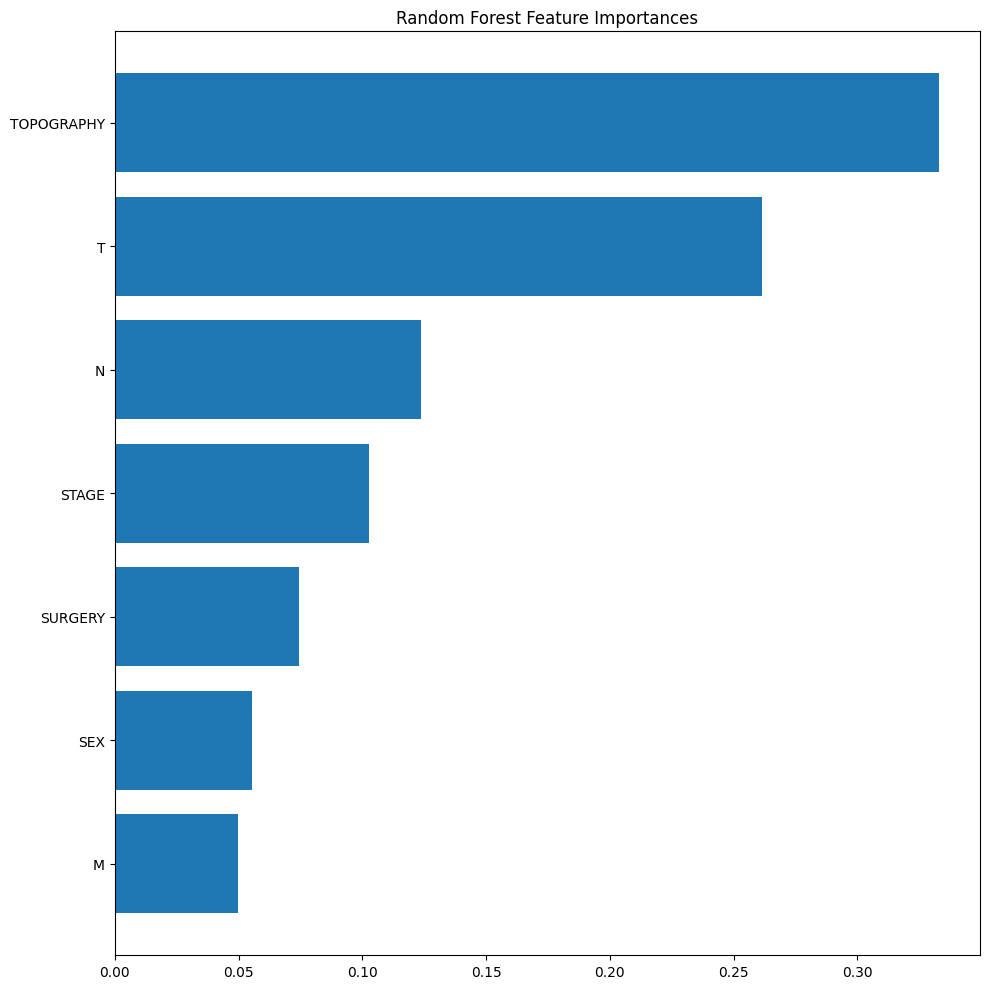

In [58]:
# Plot the impurity metric feature importances

plot_impurity_metric_features( feature_importances, sorted_idx, feature_names)

One limitation of the built-in impurity metric is that it only applies to the training data. This means it doesn't tell you which features are likely to be important on unseen data.

Instead, you can use permutation importance to measure feature importance on both the training and validation sets.

### Question 8:

- Complete the `permutation_importance` function to calculate the importance of the different features in the training set and store it to `result`.

    - Use the estimator as `best_clf.`
    - `X` and `y` are assigned values `X_train` and `y_train`.
    - `n_repeats` is assigned a value 10.
    - `n-jobs` is assigned a value 2.

- Then, use the `argsort()` to sort the features in order of importance and store it to `sorted_idx` using the `importances_mean` function.

In [30]:
### GRADED
result = None
sorted_idx = None

# YOUR CODE HERE
#raise NotImplementedError()

# --- TRAIN split (as the question requests) ---
result = permutation_importance(
    best_clf,          # the fitted RandomForest from Part 6
    X_train, y_train,  # training split
    n_repeats=10,
    n_jobs=2,
    random_state=42
)

sorted_idx = result.importances_mean.argsort()

### Answer test
print(result)
print(sorted_idx)



{'importances_mean': array([0.05973154, 0.27919463, 0.1033557 , 0.35838926, 0.12885906,
       0.03288591, 0.08791946]), 'importances_std': array([0.01217339, 0.03502816, 0.01208054, 0.03179253, 0.01986396,
       0.00469799, 0.02067506]), 'importances': array([[0.06711409, 0.06711409, 0.06040268, 0.06711409, 0.05369128,
        0.0738255 , 0.04697987, 0.03355705, 0.0738255 , 0.05369128],
       [0.24161074, 0.26174497, 0.22818792, 0.24832215, 0.25503356,
        0.30872483, 0.29530201, 0.32214765, 0.29530201, 0.33557047],
       [0.10738255, 0.11409396, 0.09395973, 0.09395973, 0.09395973,
        0.10738255, 0.12751678, 0.11409396, 0.09395973, 0.08724832],
       [0.34228188, 0.31543624, 0.37583893, 0.32214765, 0.36241611,
        0.32214765, 0.41610738, 0.39597315, 0.37583893, 0.3557047 ],
       [0.10738255, 0.15436242, 0.11409396, 0.12751678, 0.15436242,
        0.12751678, 0.12080537, 0.09395973, 0.13422819, 0.15436242],
       [0.03355705, 0.02684564, 0.03355705, 0.02684564, 0.03

Use the function below to plot the permutation importances.

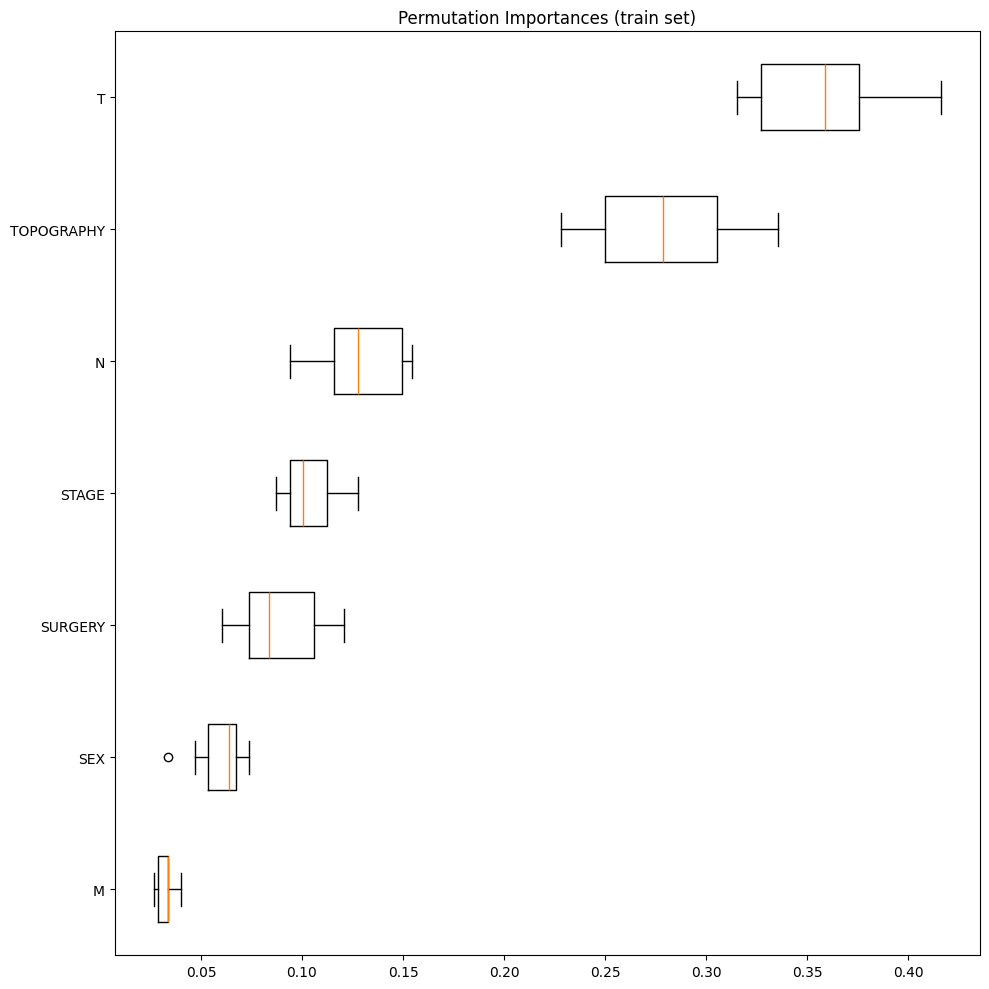

In [31]:
def plot_perm_importance(result, sorted_idx, feature_names):

    fig, ax = plt.subplots(figsize=(10, 10))
    ax.boxplot(
        result.importances[sorted_idx].T, vert=False, tick_labels=feature_names[sorted_idx]
    )
    ax.set_title("Permutation Importances (train set)")
    fig.tight_layout()
    plt.show()

plot_perm_importance(result, sorted_idx, feature_names)


The random forest graph shows a single importance score for each feature, while the permutation importances graph displays box plots to highlight the distribution and variability of scores across different permutations. This visual difference helps you understand how stable or variable each feature’s importance is.

Random forest importances are based on the model’s internal structure, specifically, how often and how effectively each feature is used to split the data within the trees. In contrast, permutation importance measures the change in model accuracy when a feature’s values are randomly shuffled. This approach provides a more direct assessment of each feature’s impact on the model’s performance.

Random forests tend to favour features that offer clear, decisive splits, which can inflate the importance of correlated features. Permutation importance, by isolating each feature’s effect, can offer a more accurate view and often lower the apparent importance of features that are strongly correlated with others.

Now, calculate the permutation importance on the test set.

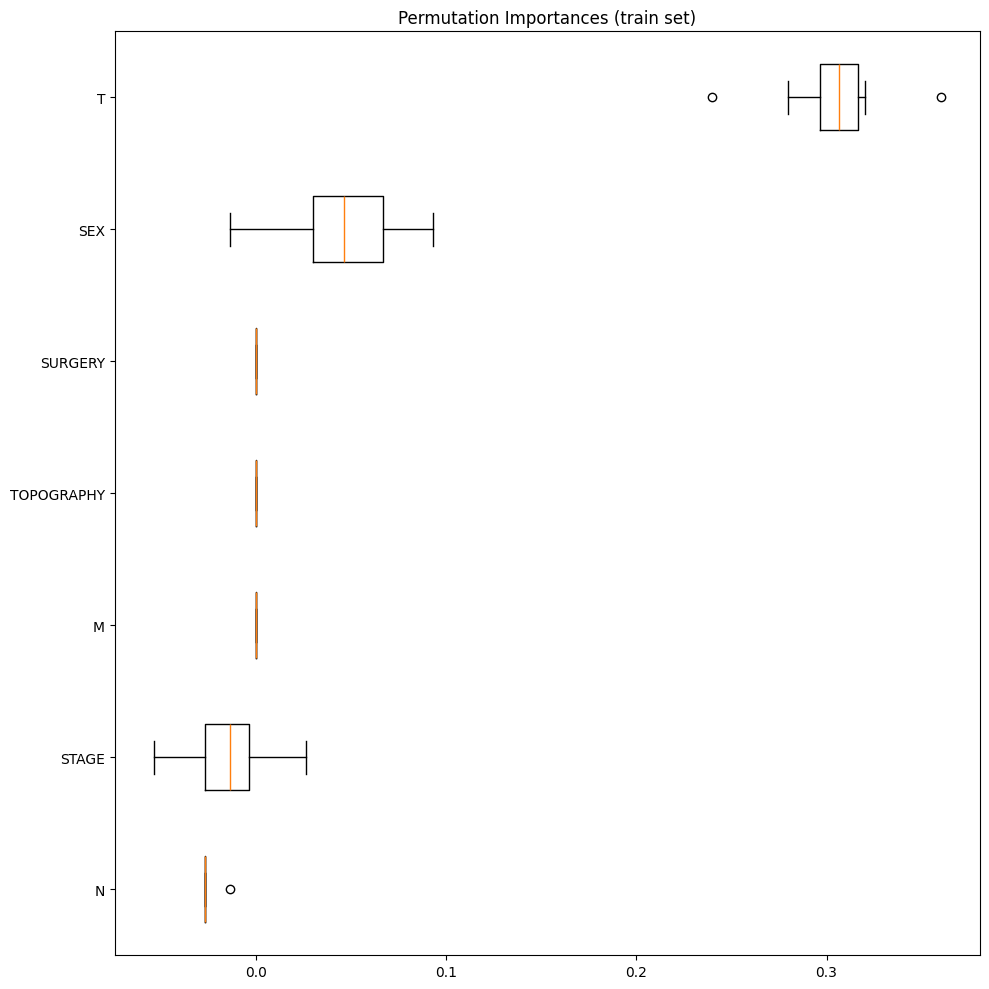

In [32]:
result = permutation_importance(best_clf, X_test, y_test, n_repeats=10, n_jobs=2)
sorted_idx = result.importances_mean.argsort()
#result.importances[sorted_idx].T, vert=False, labels=feature_names[sorted_idx]

plot_perm_importance(result, sorted_idx, feature_names)

Some features show positive importance values, indicating they contribute to the model’s accuracy. Others have negative importance values, meaning that permuting them actually improves performance.

Negative importance can result from noisy features, overfitting or strong correlations between features, all of which can harm model performance. Identifying these features and considering whether to remove or transform them, can help improve both accuracy and generalisability.